In [10]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [11]:
img = plt.imread('lena_color.gif')

In [12]:
imb3 = img[:,:,1]

In [13]:
def entropy(im):
 prob = np.array([(im==v).sum() for v in range(256)])
 prob = prob / prob.sum()

 e = - (prob[prob>0] * np.log2(prob[prob>0])).sum()
 return e

In [14]:
def temporal_sptl2(D,c):
 const=5;
 [row,col]=np.shape(D);
 pred1=np.zeros((row+1,col+1));
 pred11=np.zeros((row+1,col+1));
 pred1[0,:]= const * np.ones((1,col+1))
 pred1[1:row+1,0] = const
 pred1[1:row+1,1:col+1]= D
 
 #A
 if c == 1:
  for i in range(1, row):
    for j in range(1, col):
      pred11[i,j] = pred1[i-1,j]
 #B
 elif c == 2:
  for i in range(1, row):
    for j in range(1, col):
      pred11[i,j] = pred1[i-1,j-1]
 #C
 elif c == 3:
  for i in range(1, row):
    for j in range(1, col):
      pred11[i,j] = pred1[1, j-1]

#(A+B)/2
 elif c == 4:
  for i in range(1, row):
    for j in range(1, col):
      pred11[i,j] = 0.5 * (pred1[1, j-1] + pred1[i-1,j])

#A+B-C
 elif c == 5:
  for i in range(1, row):
    for j in range(1, col):
      pred11[i,j] = pred1[1, j-1] + pred1[i-1,j] - pred1[i-1, j-1]

#A+(B-C)/2
 elif c == 6:
  for i in range(1, row):
    for j in range(1, col):
      pred11[i,j] = pred1[i,j-1]+((pred1[i-1,j]-pred1[i-1,j-1])*0.5)

#B+(A-C)/2
 elif c == 7:
  for i in range(1, row):
    for j in range(1, col):
      pred11[i,j] = pred1[i-1,j]+((pred1[i,j-1]-pred1[i-1,j-1])*0.5)
      
 else:
  pass
 pred11 = pred11[1:row+1,1:col+1]
 pred11 = D-np.fix(pred11)
 return np.double(pred11)

In [15]:
def loco(D):
 const=10
 [row,col]= np.shape(D)
 pred1 = np.zeros((row+1,col+1))
 pred11=np.zeros((row+1,col+1))

 pred1[0,:]= const*np.ones((1,col+1))
 pred1[1:row+1,0] = const
 pred1[1:row+1,1:col+1]=D
 
 for i in range (1, row):
  for j in range (1, col):
    if (pred1[i-1,j-1] >= max(pred1[i,j-1],pred1[i-1,j])):
      pred11[i,j]=min(pred1[i,j-1],pred1[i-1,j]);

    elif (pred1[i-1,j-1] <=min (pred1[i,j-1],pred1[i-1,j])):
      pred11[i,j]=max (pred1[i,j-1],pred1[i-1,j]);

    else:
      pred11[i,j]=pred1[i,j-1]+pred1[i-1,j]-pred1[i-1,j-1];

 pred11 = pred11[1:row+1,1:col+1]
 pred11 = D-np.fix(pred11)
 return pred11

In [16]:

print("Entropy of Orginal image: ",entropy(imb3))

print("Entropy using LOCO i: ", entropy(loco(imb3)))

for c in range(1, 7):
  if c==1:
    print("X=A : ", entropy(temporal_sptl2(imb3,c)))
  if c==2:
    print("X=B : ", entropy(temporal_sptl2(imb3,c)))
  if c==3:
    print("X=C : ", entropy(temporal_sptl2(imb3,c)))
  if c==4:
    print("A+B)/2 :", entropy(temporal_sptl2(imb3,c)))
  if c==5:
    print("A+B-C :", entropy(temporal_sptl2(imb3,c)))
  if c==6:
    print("A+(B-C)/2 :", entropy(temporal_sptl2(imb3,c)))
  if c==7:
    print("B+(A-C)/2 : ", entropy(temporal_sptl2(imb3,c)))

Entropy of Orginal image:  5.457621957936371
Entropy using LOCO i:  2.4059666705777207
X=A :  2.370916751104666
X=B :  2.8900752444387527
X=C :  5.24886715364525
A+B)/2 : 5.4228834622735125
A+B-C : 5.452760871429627
A+(B-C)/2 : 3.627762146124246


In [18]:
entropy(loco(imb3))

2.4059666705777207

In [20]:
img_dp = temporal_sptl2(imb3,4)
img_loco = loco(imb3)

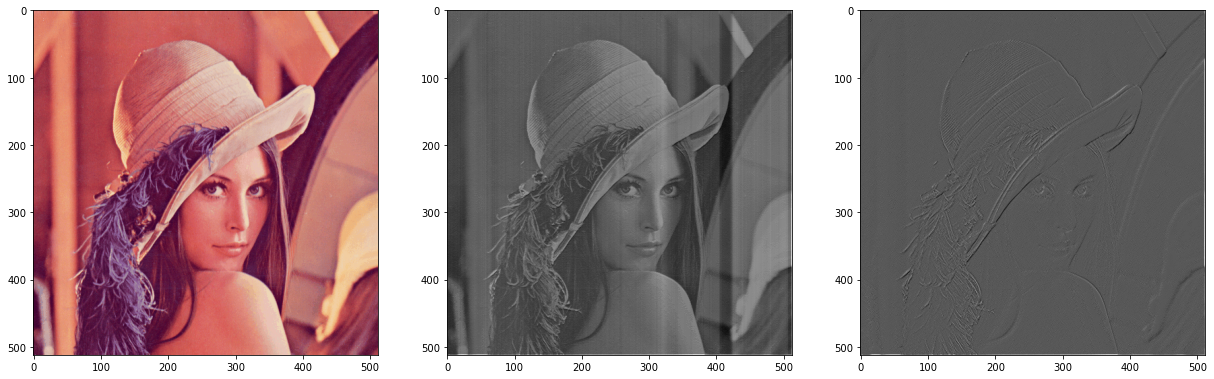

In [21]:
_, pic = plt.subplots(1,3 , figsize=(21,10))
pic[0].imshow(img, cmap='gray')
pic[1].imshow(img_dp, cmap='gray')
pic[2].imshow(img_loco, cmap='gray')